# ***Filtros de Kalman y filtros complementarios***

----

### ***Filtros de Kalman*** 

El filtro de Kalman, aparecido a principios de la década de los sesenta, es de una importancia comparable
a los trabajos realizados por Nyquist y Bode en la década de los veinte y los de Wiener en los años treinta.
El filtro de Kalman permite estimar en tiempo real el vector de estado de un sistema dinámico lineal a partir
de medidas ruidosas indirectas que de él se van tomando. Estas estimaciones en tiempo real del estado del
sistema son valiosas en sí mismas cuando el sistema opera en lazo abierto; pero considerando la posibilidad
de operación en lazo cerrado, las mismas pueden ser utilizadas para sintetizar una acción de control
adecuada que lleve el sistema al estado deseado. [1]

###  Descripción del Sistema Dinámico

Considere un sistema dinámico descrito por las siguientes ecuaciones:

$$x_k = f(x_{k-1}) + w_{k-1},\;\; w_{k-1} \sim \mathcal{N}(0, Q_{t})$$
$$z_k = h(x_k) + v_{k},\;\; v_{k} \sim \mathcal{N}(0, R_{t})$$

donde:
- **$x_k$** representa el vector de estados desconocidos en el tiempo $k$.
- **$f(\cdot)$** es la función de transición del estado, que en un modelo lineal se expresa como la siguiente ecuación en diferencias:
  $$x_{k+1} = A x_k + B u_k + w_k$$
  donde $A$ es la matriz de transición del estado, $B$ es la matriz de control, y $u_k$ es el vector de control en el tiempo $k$.
- **$z_k$** es el vector de observaciones en el tiempo $k$.
- **$h(\cdot)$** es la función que mapea el estado actual al espacio de observaciones.
- **$w_{k-1} \sim \mathcal{N}(0, Q_{t})$** y **$v_k \sim \mathcal{N}(0, R_{t})$** son los procesos de ruido para el estado y las observaciones, respectivamente, ambos asumidos normalmente distribuidos con media cero y covarianzas $Q_t$ y $R_t$.

### Estado Inicial

El estado inicial **$x_0$** se caracteriza por:
- Una media conocida **$\mu_0 = E[x_0]$**
- Una covarianza **$P_0 = E[(x_0 - \mu_0)(x_0 - \mu_0)^T]$**

### Momentos Estadísticos

Los momentos de primer y segundo orden (caso X X) de las variables se describen como:
- La esperanza matemática de una variable aleatoria **$X$**: $$E[X] = \sum_{i=1}^{N} x_i P(X = x_i)$$
- La esperanza matemática del producto de dos variables aleatorias **$X$ e $Y$**: $$E[XY] = \sum_{i=1}^{N}\sum_{j=1}^{N} x_i y_j P(X = x_i, Y = y_j)$$

### Propiedades Estadísticas del Ruido en el Filtro de Kalman

Para las propiedades estadísticas del ruido en el filtro de Kalman, se asume que:
- $$E[w_k w_k^T] = Q_t \quad \text{(covarianza del ruido del proceso en el tiempo $t$)}$$
- $$E[v_k v_k^T] = R_t \quad \text{(covarianza del ruido de observación en el tiempo $t$)}$$
- Los ruidos en el proceso y en las observaciones son independientes entre sí para todos los tiempos, es decir:
  $$E[w_k v_j^T] = 0 \quad \text{para todos } k \neq j$$

Estas ecuaciones y propiedades forman la base de los modelos utilizados en el filtrado de Kalman, permitiendo estimaciones óptimas bajo supuestos de linealidad y normalidad en las distribuciones de ruido. Una vez definido la razon de coherencia de las variables podemos establecer las fases del filtro de kalman.

### Fases del Filtro de Kalman

El filtro opera mediante dos fases iterativas: **predicción** y **corrección**.

1. **Predicción**:
   - Utiliza el modelo del sistema para proyectar hacia adelante el estado actual estimado.
   - Predice el próximo estado basándose en las estimaciones actuales y en las entradas de control, si las hay.

2. **Corrección**:
   - Ajusta las predicciones basándose en nuevas mediciones.
   - Actualiza la estimación del estado para reflejar la nueva información, minimizando así la varianza del error de estimación.

### Ecuaciones del Filtro de Kalman

El filtro se basa en un conjunto de ecuaciones matemáticas para la predicción y la corrección:

- **Predicción**:
  - Predicción del estado: 
    $$\hat{x}_{k|k-1} = A \hat{x}_{k-1|k-1} + B u_k$$
  - Predicción de la covarianza del error: 
    $$P_{k|k-1} = A P_{k-1|k-1} A^T + Q$$

- **Corrección**:
  - Ganancia de Kalman: 
    $$K_k = P_{k|k-1} H^T (H P_{k|k-1} H^T + R)^{-1}$$
  - Actualización del estado: 
    $$\hat{x}_{k|k} = \hat{x}_{k|k-1} + K_k (z_k - H \hat{x}_{k|k-1})$$
  - Actualización de la covarianza: 
    $$P_{k|k} = (I - K_k H) P_{k|k-1}$$

### Componentes del Filtro de Kalman

- \(A\): Matriz de transición del estado.
- \(B\): Matriz de control.
- \(H\): Matriz de observación.
- \(Q\): Covarianza del ruido del proceso.
- \(R\): Covarianza del ruido de observación.
- \(u_k\): Control en el tiempo \(k\).
- \(z_k\): Medición en el tiempo \(k\).

### Aplicaciones del Filtro de Kalman

El filtro de Kalman se utiliza ampliamente en:
- Navegación y control de vehículos.
- Procesamiento de señales.
- Seguimiento de objetos en visión por computadora.


#### ***Filtros Complementario*** 

El **filtro complementario** es una técnica efectiva usada en el procesamiento de señales y sistemas de control, particularmente en la fusión de sensores para estimaciones de orientación y posicionamiento en robótica y navegación. Este método ofrece una alternativa menos compleja al filtro de Kalman para combinar mediciones de múltiples sensores con diferentes características de ruido y dinámicas.

### Principios del Filtro Complementario

El filtro complementario combina dos o más fuentes de señales para sacar provecho de las fortalezas de unas y compensar las debilidades de otras. Es comúnmente utilizado para fusionar datos de sensores que son precisos a corto plazo pero propensos a la deriva con el tiempo, con aquellos que son menos precisos a corto plazo pero más estables a largo plazo.

### Funcionamiento del Filtro Complementario

El filtro opera mediante la ponderación de dos series de datos: una de alta frecuencia pero ruidosa (como los datos de un giroscopio) y otra de baja frecuencia pero más estable (como los datos de un acelerómetro o magnetómetro). La estructura básica del filtro es combinar las señales para obtener lo mejor de cada una:

1. **Datos de Alta Frecuencia (giroscopio):**
   - Proporcionan respuestas rápidas y son excelentes para la detección dinámica.
   - Sujetos a errores acumulativos o deriva a lo largo del tiempo.

2. **Datos de Baja Frecuencia (acelerómetro/magnetómetro):**
   - Ofrecen correcciones más lentas pero precisas.
   - Útiles para corregir las derivas observadas en los datos de alta frecuencia.

### Ecuaciones del Filtro Complementario

El filtro complementario es una técnica eficiente para combinar señales de diferentes sensores con el fin de obtener estimaciones precisas de parámetros como la orientación. A continuación, se presentan las ecuaciones básicas utilizadas en un filtro complementario típico.

### Señales de los Sensores

1. **Señal del Giroscopio**:
   - Proporciona la tasa de cambio del ángulo (velocidad angular),  $\dot{\theta}_{gyro}$, que se integra sobre el tiempo para obtener una estimación del ángulo:
     $$
     \theta_{gyro}(t) = \theta_{gyro}(t-1) + \dot{\theta}_{gyro} \cdot \Delta t
     $$
   - $\Delta t$ es el intervalo de tiempo entre mediciones.

2. **Señal del Acelerómetro**:
   - Usada para obtener una estimación del ángulo basada en la gravedad. Por ejemplo, el ángulo de inclinación en el eje x se puede calcular como:
     $$
     \theta_{acc} = \arctan\left(\frac{a_y}{\sqrt{a_x^2 + a_z^2}}\right)
     $$
   - \( $a_x$ \), \( $a_y$ \), y \( $a_z$ \) son las aceleraciones medidas en cada uno de los ejes.

### Combinación de las Señales

El filtro complementario combina estas dos estimaciones para obtener un ángulo final \( \theta \) usando un factor de ponderación \( \alpha \):
$$
\theta(t) = \alpha \cdot \theta_{gyro}(t) + (1 - \alpha) \cdot \theta_{acc}
$$
- **\( \alpha \)** es un parámetro que se ajusta según la dinámica del sistema y las características de ruido de los sensores. Un valor común para \( \alpha \) puede estar en el rango de 0.98, dando más peso a la integración del giroscopio y utilizando el acelerómetro para correcciones lentas.

### Consideraciones

- El filtro complementario es eficaz cuando los sensores tienen características de ruido complementarias.
- Su sencillez lo hace atractivo para implementaciones en hardware con recursos limitados.
- Puede requerir ajustes manuales y experimentación para optimizar el parámetro \( \alpha \).

Este enfoque ofrece un método efectivo y de bajo costo computacional para fusionar datos sensoriales, ideal para aplicaciones en tiempo real donde la eficiencia es crítica.


### Aplicaciones del Filtro Complementario

Este filtro es ideal para aplicaciones donde se necesitan respuestas rápidas y correcciones precisas a largo plazo, tales como:
- Estabilización de cámaras y drones.
- Navegación en vehículos autónomos.
- Aplicaciones de realidad aumentada y virtual.

El filtro complementario se destaca por su simplicidad y eficacia en la fusión de datos sensoriales, siendo una opción valiosa en sistemas donde la complejidad computacional debe mantenerse baja mientras se asegura una alta precisión en la estimación de estado.


---

#### ***Experimentación*** 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('classic')

In [2]:
data = pd.read_excel(r'..\Data\front.xlsx')

In [3]:
data.head(4)

,Accel x (m/s^2),Accel y (m/s^2),Accel z (m/s^2),w_x (rad/s),w_y (rad/s),w_z (rad/s),Temp (Â°C)
0,2.30,-0.71,15.91,1.00,0.40,1.80,24.57
1,1.66,-1.17,17.64,0.80,0.44,1.32,24.57
2,1.71,-1.22,17.68,1.16,0.09,0.93,24.57
3,2.04,-0.79,16.59,1.22,-0.21,0.53,24.57


In [12]:
'''
    Se crea el vector de tiempo asociado a la tasa de muestreo del sensor
'''
data_len = len(data) 
T = 1 / 10 
total_time = T * data_len 
t = np.linspace(0, total_time, data_len)
data['time'] = t

> Visualización inicial de los datos

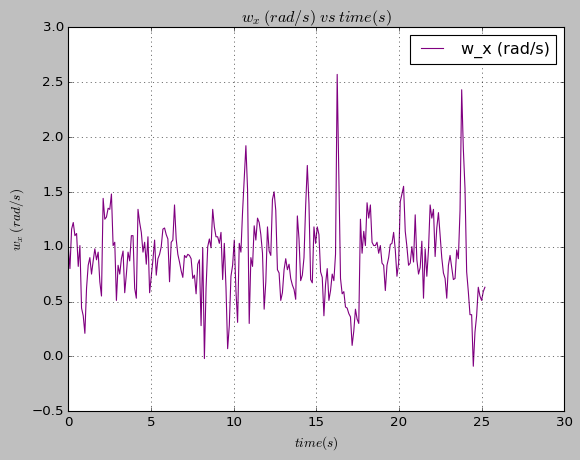

In [20]:
data.plot(x='time', y='w_x (rad/s)', color='purple')
plt.grid()
plt.ylabel(r'$w_{x}\;(rad/s)$')
plt.xlabel('$time (s)$')
plt.title(r'$w_{x}\;(rad/s)\; vs \; time(s)$')
plt.show()

In [101]:
# asumiendo el angulo inicial como 
data['angle_x'] = np.arctan(data['Accel x (m/s^2)'] / ( (data['Accel y (m/s^2)'])**2 + (data['Accel z (m/s^2)'])**2 )**( 1 / 2))
data['angle_x (degrees)'] = np.rad2deg(np.arctan(data['Accel x (m/s^2)'] / ( (data['Accel y (m/s^2)'])**2 + (data['Accel z (m/s^2)'])**2 )**( 1 / 2)))

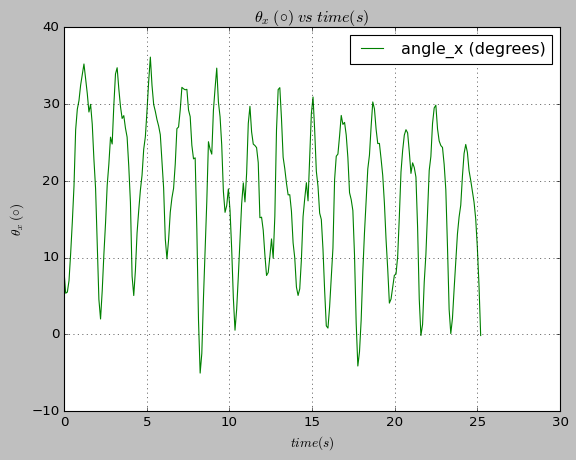

In [39]:
data.plot(x='time', y='angle_x (degrees)', color='g')
plt.grid()
plt.ylabel(r'$\theta_{x}\;(\circ)$')
plt.xlabel('$time (s)$')
plt.title(r'$\theta_{x}\;(\circ)\; vs \; time(s)$')
plt.show()

- Filtro complementario

In [51]:
print(data.shape[0])

252


In [112]:
angle_x_prev = 0
valores = [[0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]
for mu, lamb in valores:
    name = 'angle_x_fc_{:.1f}'.format(mu)
    data[name] = np.zeros(data.shape[0])    
    for i in range(data.shape[0]):
        data[name].iloc[i] = mu * (angle_x_prev + np.rad2deg(data['w_x (rad/s)'].iloc[i]* (1 / 10))) + lamb*np.rad2deg(np.arctan(data['Accel x (m/s^2)'].iloc[i] / ( (data['Accel y (m/s^2)'].iloc[i])**2 + (data['Accel z (m/s^2)'].iloc[i])**2 )**( 1 / 2)))
        angle_x_prev = data['angle_x_fc'].iloc[i]  

In [113]:
data.head(0)

,Accel x (m/s^2),Accel y (m/s^2),Accel z (m/s^2),w_x (rad/s),w_y (rad/s),w_z (rad/s),Temp (Â°C),time,angle_x (degrees),angle_x_fc,angle_x_fc_0.2,angle_x_fc_0.3,angle_x_fc_0.4,angle_x_fc_0.5,angle_x


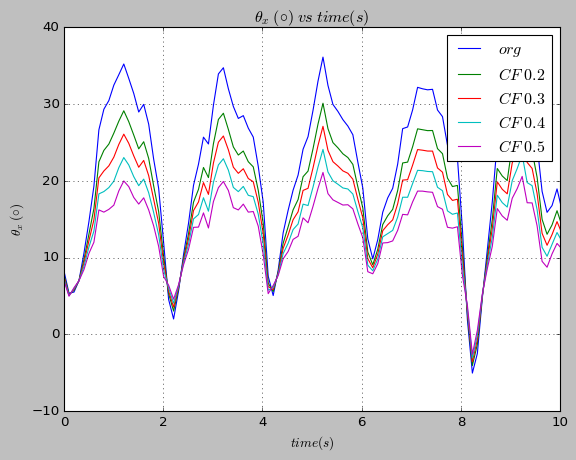

In [114]:
compare_x_angle = data['angle_x (degrees)'].to_numpy()
counter = 0
compare_x_angle_fc = np.zeros([data_len,len(valores)])
for mu in [sub[0] for sub in valores]:
    name = 'angle_x_fc_{:.1f}'.format(mu)
    compare_x_angle_fc[:, counter] = data[name].to_numpy()
    counter += 1

plt.plot(t, compare_x_angle, label=r'$org$')
plt.plot(t, compare_x_angle_fc[:,0], label=r'$CF\;0.2$')
plt.plot(t, compare_x_angle_fc[:,1], label=r'$CF\;0.3$')
plt.plot(t, compare_x_angle_fc[:,2], label=r'$CF\;0.4$')
plt.plot(t, compare_x_angle_fc[:,3], label=r'$CF\;0.5$')
plt.grid()
plt.xlim([0,10])
plt.legend()
plt.ylabel(r'$\theta_{x}\;(\circ)$')
plt.xlabel('$time (s)$')
plt.title(r'$\theta_{x}\;(\circ)\; vs \; time(s)$')
plt.show()

In [109]:
import numpy as np

bias = 0
R_measure = 0.15  # ruido medido
Q_angle = 0.1     # ruido procesado
Q_bias = 0.3
R_measure = 1     # ruido medido

P = np.zeros((2, 2))
K = np.zeros(2)
angle = 0

def getAngle(pitch, gyrorate, dt):

    global bias
    global angle
    global P

    rate = gyrorate - bias
    angle += dt * rate

    P[0, 0] += dt * (dt * P[1, 1] - P[0, 1] - P[1, 0] + Q_angle)
    P[0, 1] -= dt * P[1, 1]
    P[1, 0] -= dt * P[1, 1]
    P[1, 1] += Q_bias * dt

    S = P[0, 0] + R_measure
    K[0] = P[0, 0] / S
    K[1] = P[1, 0] / S
    y = pitch - angle

    angle += K[0] * y
    bias += K[1] * y

    P -= np.outer(K, P[0])

    return angle


In [116]:
pitch_data = data['angle_x']
gyrorate_data = data['w_x (rad/s)']
dt_data = (1 / 10)

angle_results = []

for pitch, gyrorate in zip(pitch_data, gyrorate_data):
    angle_result = getAngle(pitch, gyrorate, dt_data)
    angle_results.append(angle_result)

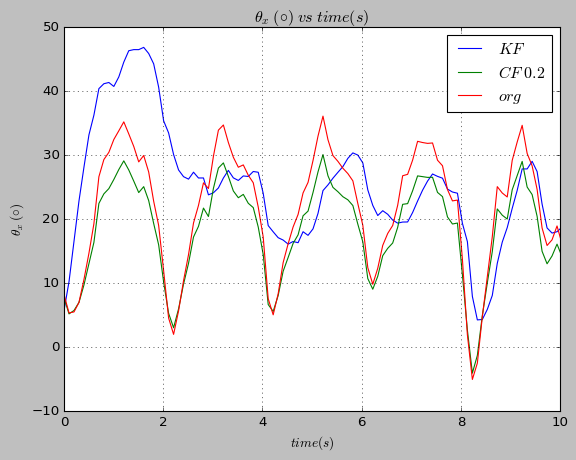

In [120]:
plt.plot(t, np.rad2deg(angle_results), label=r'$KF$')
plt.plot(t, compare_x_angle_fc[:,0], label=r'$CF\;0.2$')
plt.plot(t, compare_x_angle, label=r'$org$')
plt.grid()
plt.xlim([0,10])
plt.legend()
plt.ylabel(r'$\theta_{x}\;(\circ)$')
plt.xlabel('$time (s)$')
plt.title(r'$\theta_{x}\;(\circ)\; vs \; time(s)$')
plt.show()